In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import numpy as np

In [2]:
names = ["id", "stn_no", "district", "stn_name", "1", "2", "lat", "lon", "3", "4", "5", "6", "7", "8", \
"9", "10", "11", "12", "13", "14", "15", "16"]	
df = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/obs/aws/daily_aus_full/DC02D_StnDet_999999999643799.txt",\
names=names, header=0)

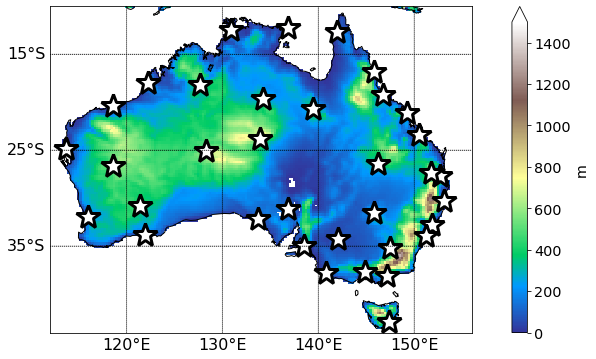

In [13]:
start_lat = -44; end_lat = -10; start_lon = 112; end_lon = 156
m = Basemap(llcrnrlon = start_lon, llcrnrlat = start_lat, urcrnrlon = end_lon, \
    urcrnrlat = end_lat, projection="cyl", resolution = "l")
topog = xr.open_dataset("/g/data/ub4/era5/netcdf/static_era5.nc")
lsm = xr.open_dataset("/g/data/ub4/era5/netcdf/static_era5.nc")
plt.figure(figsize=[10,6])
ax=plt.gca()
c=xr.where(lsm["lsm"]>=0.5,topog["z"]/9.8, np.nan).plot(ax=ax, vmin=0, vmax=1500, cmap=plt.get_cmap("terrain"), add_labels=False, add_colorbar=False)
cb = plt.colorbar(c, extend="max")
cb.set_label(label='m', size='x-large')
cb.ax.tick_params(labelsize='x-large')
df[["lon","lat"]].plot(ax=ax, x="lon", y="lat", marker="*", mfc="white", linestyle="none", ms=25, mew=3, legend=False, mec="k")
plt.xlabel("")
m.drawcoastlines()
m.drawmeridians([120,130,140,150], labels=[0,0,0,1], size=16)
m.drawparallels([-35,-25,-15], labels=[1,0,0,0], size=16)
plt.savefig("/g/data/eg3/ab4502/figs/stn_map.png", bbox_inches="tight")

In [12]:
lsm.z

<xarray.DataArray 'z' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [43]:
matplotlib.markers?

Type:        module
String form: <module 'matplotlib.markers' from '/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/matplotlib/markers.py'>
File:        /g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/matplotlib/markers.py
Docstring:  
This module contains functions to handle markers.  Used by both the
marker functionality of `~matplotlib.axes.Axes.plot` and
`~matplotlib.axes.Axes.scatter`.

All possible markers are defined here:

============================== ====== =========================================
marker                         symbol description
============================== ====== =========================================
``"."``                        |m00|  point
``","``                        |m01|  pixel
``"o"``                        |m02|  circle
``"v"``                        |m03|  triangle_down
``"^"``                        |m04|  triangle_up
``"<"``                        |m05|  triangle_left
``">"``     

In [51]:
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable f